# Data Cleaning 2: aka Machine Learning Data Prep

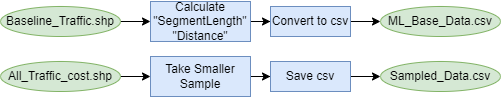

This file prepares two datasets so they can be directly input into the machine learning code.

Dataset 1: ML_Base_data --> this is a csv file that holds the traffic lines for our baseline data. The machine learning model can make predictions for these road segments.

Dataset 2: SampledData --> our initial dataset with all the sports data is way too large to work with efficiently, so we subset for easier use.


## Import Statements

In [24]:
import os
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
#location to current directory
file_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath) + '\\final_files'
os.chdir(file_path)
arcpy.env.workspace = file_path
print(arcpy.env.workspace)

import geopandas as gpd
from datetime import datetime
from shapely.geometry import LineString
import pandas as pd

C:\Users\Track\OneDrive\Documents\ArcGIS\Projects\ArcIIFinalTransitProject\final_files


# Prepping Baseline Data

We want to have an easy dataset to be able to apply our machine learning model and show results on a map.

In [25]:
#read the shapefile
gdf = gpd.read_file(arcpy.env.workspace + "\\no_traffic_lines.shp")
#calculate the 'Latitude' and 'Longitude' based on the center of the Line String
gdf['Latitude'] = gdf['geometry'].centroid.y
gdf['Longitude'] = gdf['geometry'].centroid.x
gdf['geometry_wkt'] = gdf['geometry'].to_wkt()
#calculate segment length and distance from the road line data
gdf['SegmentLength'] = gdf['FromCumu_2'] - gdf['ToCumul_Ki']
gdf['Distance'] = (gdf['FromCumu_2'] + gdf['ToCumul_Ki']) / 2

#select we want to be used
columns_to_keep = {
    'SourceOID': 'SourceOID',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'geometry_wkt' : 'geometry_wkt',
    'SegmentLength' : 'SegmentLength',
    'Distance' : 'Distance'
}
gdf = gdf.rename(columns=columns_to_keep)[list(columns_to_keep.values())]
#save to CSV
gdf.to_csv(arcpy.env.workspace + "\\ML_Base_data.csv", index=False)
print(f"Saved")

Saved


# Subsetting our full sporting event dataset

The full sporting dataset is very large, so we want to utilize a smaller size

In [ ]:
#load the large dataset from the CSV file into a DataFrame
data = pd.read_csv(arcpy.env.workspace + "\\AllTrafficCost.csv")
#create a random sample of 20% of the data
sampled_data = data.sample(frac=0.2, random_state=42)
#save the sampled data to a new CSV file
sampled_data.to_csv(arcpy.env.workspace + "\\SampledData2.csv", index=False)